In [2]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
import matplotlib
import matplotlib.pyplot as plt

In [3]:
plt.style.use('ggplot')
matplotlib.rcParams['figure.dpi'] = 100

## WellHeader

In [4]:
path = '../'
wh = pd.read_csv(path+'WellHeader_Datathon.csv', memory_map=True, na_values=['', 'Unspecified', 'Not Applicable'])
print(wh.shape)
wh.head()

(10437, 89)


C:\Users\Nguyen\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (32,34,35,37,42,44,45,47,63,80,81) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,LicenceDate,CurrentStatus,CurrentStatusStandardised,WellType,WellTypeStandardised,ConfidentialReleaseDate,AbandonDate,SurfAbandonDate,WellName,Formation,Field,Pool,SurveySystem,Surf_Location,Surf_Township,Surf_Meridian,Surf_Range,Surf_Section,Surf_LSD,Surf_Longitude,Surf_Latitude,Surf_TownshipRange,Surf_QuarterUnit,Surf_Unit,Surf_Block,Surf_NTSMapSheet,Surf_Series,Surf_Area,Surf_Sheet,Surf_QuarterSection,BH_Location,BH_TownshipRange,BH_QuarterUnit,BH_Unit,BH_Block,BH_NTSMapSheet,BH_Series,BH_Area,BH_Sheet,BH_QuarterSection,BH_Longitude,BH_Latitude,BH_Township,BH_Meridian,BH_Range,BH_Section,BH_LSD,GroundElevation,KBElevation,TotalDepth,LaheeClass,Confidential,SurfaceOwner,OSArea,OSDeposit,DrillingContractor,SpudDate,FinalDrillDate,RigReleaseDate,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,Country,RegulatoryAgency,PSACAreaCode,PSACAreaName,ProjectedDepth,StatusDate,StatusSource,UnitID,UnitName,UnitFlag,Municipality,CompletionDate,Agent,_Completed`Flag,_Perf`Flag,Match
0,2587301,Alberta,475898,100122706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,6/25/2015,Gas Lift,Active,Crude Oil,Oil,NaN,NaN,NaN,ENERPLUS CORP HZ ANTEN 12-27-66-24,Montney,Ante Creek North,Commingled Pool 005,DLS,13-26-066-24-W5,66.0,W5,24.0,26.0,13.0,-117.529866,54.747632,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,12-27-066-24-W5,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NW,-117.553826,54.743675,66.0,W5,24.0,27.0,12.0,758.7,764.8,3677.0,Development,Non-Confidential,Crown,NaN,NaN,Excalibur Drilling Ltd,12/5/2015,12/18/2015,12/21/2015,13.0,282.85,NaN,Horizontal,Canada,AER,AB2,Foothills Front,3800.0,2/28/2016,AER,NaN,NaN,No,NaN,NaN,NaN,1,1,Yes
1,2593278,Alberta,479407,102052706624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,5/6/2016,Gas Lift,Active,Crude Oil,Oil,NaN,NaN,NaN,ENERPLUS CORP 102HZ ANTEN 5-27-66-24,Montney,Ante Creek North,Commingled Pool 005,DLS,04-26-066-24-W5,66.0,W5,24.0,26.0,4.0,-117.527042,54.737446,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SW,05-27-066-24-W5,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SW,-117.553836,54.739474,66.0,W5,24.0,27.0,5.0,766.3,770.8,3607.0,Development,Non-Confidential,Crown,NaN,NaN,Excalibur Drilling Ltd,5/26/2016,6/8/2016,6/10/2016,13.0,277.46,1954.58,Horizontal,Canada,AER,AB2,Foothills Front,3700.0,9/23/2016,AER,NaN,NaN,No,NaN,NaN,NaN,1,1,Yes
2,2579437,Alberta,469132,100162206624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,8/14/2014,Gas Lift,Active,Crude Oil,Oil,NaN,NaN,NaN,ENERPLUS CORP HZ ANTEN 16-22-66-24,Montney,Ante Creek North,Commingled Pool 005,DLS,16-21-066-24-W5,66.0,W5,24.0,21.0,16.0,-117.559923,54.730864,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,16-22-066-24-W5,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,-117.534302,54.733247,66.0,W5,24.0,22.0,16.0,754.5,759.4,3502.0,Development,Non-Confidential,Crown,NaN,NaN,Excalibur Drilling Ltd,1/6/2015,1/19/2015,1/22/2015,13.0,269.38,1940.06,Horizontal,Canada,AER,AB2,Foothills Front,3800.0,11/24/2015,AER,NaN,NaN,No,NaN,NaN,NaN,1,1,Yes
3,2591761,Alberta,478708,100092206624W500,Enerplus Corporation,267,Enerplus Corporation,Enerplus Corporation,267,Enerplus Corporation,1/11/2016,Gas Lift,Active,Crude Oil,Oil,NaN,NaN,NaN,ENERPLUS CORP HZ ANTEN 9-22-66-24,Montney,Ante Creek North,Commingled Pool 005,DLS,16-21-066-24-W5,66.0,W5,24.0,21.0,16.0,-117.560141,54.730703,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,09-22-066-24-W5,066-24-W5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NE,-117.534282,54.729643,66.0,W5,24.0,22.0,9.0,755.3,759.8,3491.0,Development,Non-Confidential,Crown,NaN,NaN,Excalibur Drilling Ltd,1/12/2016,1/24/2016,1/26/2016,12.0,290.92,1945.01,Horizontal,Canada,AER,AB2,Foothills Front,3500.0,2/17/2016,AER,NaN,NaN,No,NaN,NaN,NaN,1,1,Yes
4,2587302,Alberta,475923,100082206624W500,Enerplu

In [5]:
wh.columns[[32,34,35,37,42,44,45,47,63,80,81]]

Index(['Surf_QuarterUnit', 'Surf_Block', 'Surf_NTSMapSheet', 'Surf_Area',
       'BH_QuarterUnit', 'BH_Block', 'BH_NTSMapSheet', 'BH_Area', 'OSArea',
       'UnitID', 'UnitName'],
      dtype='object')

In [6]:
# Check columns with warninings, just mixed of NaN and string, no issue
for var in wh.columns[[32,34,35,37,42,44,45,47,63,80,81]]: 
    print(var, wh[var].unique())

Surf_QuarterUnit [nan 'C' 'B' 'D' 'A']
Surf_Block [nan 'H' 'I' 'G' 'C' 'A' 'L' 'F' 'K' 'J' 'B' 'D' 'E']
Surf_NTSMapSheet [nan '093-P-10' '094-A-12' '094-B-16' '094-H-04' '094-B-09' '094-G-08'
 '094-H-03' '094-A-13' '094-H-05' '094-G-01' '094-G-02' '094-G-07'
 '094-G-10' '093-P-09']
Surf_Area [nan 'P' 'A' 'B' 'H' 'G']
BH_QuarterUnit [nan 'B' 'D' 'A' 'C']
BH_Block [nan 'B' 'C' 'H' 'A' 'D' 'I' 'L' 'G' 'K' 'F' 'J' 'E']
BH_NTSMapSheet [nan '094-B-16' '094-H-04' '094-B-09' '094-H-03' '094-G-08' '094-A-13'
 '094-H-05' '094-G-01' '094-G-02' '093-P-10' '094-A-12' '094-G-07'
 '094-G-10' '094-A-14' '093-P-09' '093-P-08']
BH_Area [nan 'B' 'H' 'G' 'A' 'P']
OSArea [nan 'Peace River Area 1']
UnitID [nan 'SK UN U5021' 'SK UN U5005' 'SK UN U5018' 'SK UN U5001' 'SK UN U5003'
 'SK UN U5004' 'SK UN U5019' 'SK UN U5026' 'SK UN U5002' 'SK UN U5017'
 'AB UN 088    PA1120' 'AB UN 088    PA1353' 'AB UN 088    PA1371'
 'AB UN 088    PA1372' 'AB UN 088    PA1285' 'AB UN 088    PA1333'
 'AB UN 088    PA1441' 'AB 

In [7]:
sm = pd.read_csv(path+'Submission_Sample.csv')
print(sm.shape)

(1963, 2)


In [8]:
set(wh.loc[wh.TVD.isnull(), 'EPAssetsId']).issuperset(sm.EPAssetsId)

True

In [9]:
# Remove unneeded rows
keep_rows = list(set(wh.loc[wh.TVD.isnull()==False, 'EPAssetsId'].values) | set(sm.EPAssetsId.values))
wh = wh[wh.EPAssetsId.isin(keep_rows)]

### Cleaning up

#### Datetime variables

In [10]:
wh.columns[wh.columns.str.contains('Date')].values

array(['LicenceDate', 'ConfidentialReleaseDate', 'AbandonDate',
       'SurfAbandonDate', 'SpudDate', 'FinalDrillDate', 'RigReleaseDate',
       'StatusDate', 'CompletionDate'], dtype=object)

In [11]:
for var in wh.columns[wh.columns.str.contains('Date')].values: 
    wh[var] = pd.to_datetime(wh[var])

#### Constant variables

In [12]:
constant_var = wh.columns[wh.nunique(dropna=True)<=1]
for col in constant_var: 
    print(col + ': ' + str(wh[col].unique()))

AbandonDate: ['NaT']
SurfAbandonDate: ['NaT']
SurveySystem: ['DLS']
Surf_QuarterUnit: [nan]
Surf_Unit: [nan]
Surf_Block: [nan]
Surf_NTSMapSheet: [nan]
Surf_Series: [nan]
Surf_Area: [nan]
Surf_Sheet: [nan]
BH_QuarterUnit: [nan]
BH_Unit: [nan]
BH_Block: [nan]
BH_NTSMapSheet: [nan]
BH_Series: [nan]
BH_Area: [nan]
BH_Sheet: [nan]
OSArea: [nan 'Peace River Area 1']
OSDeposit: [nan]
Country: ['Canada']
CompletionDate: [                          'NaT' '2020-08-11T00:00:00.000000000']
Agent: [nan]
_Completed`Flag: [1]
_Perf`Flag: [1]
Match: ['Yes']


In [18]:
wh.drop(constant_var, axis=1, inplace=True)
print(wh.shape)
wh.describe()

(8694, 64)


,EPAssetsId,CurrentOperatorParent,LicenseeParentCompany,Surf_Township,Surf_Range,Surf_Section,Surf_LSD,Surf_Longitude,Surf_Latitude,BH_Longitude,BH_Latitude,BH_Township,BH_Range,BH_Section,BH_LSD,GroundElevation,KBElevation,TotalDepth,DaysDrilling,DrillMetresPerDay,TVD,ProjectedDepth
count,8.694000e+03,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,8694.000000,6731.000000,8308.000000
mean,1.923655e+06,2162.448470,2172.284794,42.457212,15.932252,18.722567,8.565793,-112.543043,52.664693,-112.542676,52.665151,42.459052,15.929837,18.876812,8.586841,779.849551,784.799708,3015.369511,15.322636,706.085837,1419.494328,2477.018028
std,7.190129e+05,2876.465661,2882.069463,16.409412,7.518673,10.609553,4.939853,4.094834,1.429560,4.094726,1.430171,16.402867,7.529849,10.331651,4.929597,132.413854,133.153498,1689.829053,30.032465,527.598833,913.827019,2096.150126
min,1.145472e+06,16.000000,16.000000,12.000000,1.000000,1.000000,1.000000,-119.972137,49.961725,-119.999593,49.964650,12.000000,1.000000,1.000000,1.000000,565.200000,569.800000,888.000000,0.000000,0.000000,134.000000,575.000000
25%,1.165976e+06,211.000000,211.000000,30.000000,8.000000,9.000000,4.000000,-116.902413,51.567844,-116.903199,51.567990,30.000000,8.000000,10.000000,4.000000,691.900000,696.100000,1545.000000,2.000000,264.300000,711.455000,711.000000
50%,2.585176e+06,1303.000000,1303.000000,34.000000,19.000000,19.000000,8.000000,-110.502463,51.922961,-110.489656,51.923925,34.000000,19.000000,19.000000,9.000000,716.400000,720.800000,2254.500000,3.000000,607.360000,765.890000,1582.000000
75%,2.605988e+06,1854.000000,1854.000000,60.000000,22.000000,28.000000,13.000000,-108.934929,54.214698,-108.931956,54.222186,60.000000,22.000000,28.000000,13.000000,856.500000,862.000000,4463.000000,15.000000,1027.375000,2206.350000,4316.250000
max,2.625908e+06,9901.000000,9901.000000,87.000000,29.000000,36.000000,16.000000,-107.746019,56.594819,-107.726882,56.580394,87.000000,29.000000,36.000000,16.000000,1371.100000,1377.000000,7848.000000,738.000000,2655.000000,4366.000000,7550.000000


#### Variable types

In [19]:
wh['CurrentOperatorParent'] = wh['CurrentOperatorParent'].astype('object')
wh['LicenseeParentCompany'] = wh['LicenseeParentCompany'].astype('object')

In [20]:
datatype = pd.DataFrame(wh.dtypes, columns=['pdtype'])
datatype['nunique'] = wh.nunique()
datatype['nnan'] = np.sum(wh.isna())
datatype

,pdtype,nunique,nnan
EPAssetsId,int64,8694,0
Province,object,2,0
LicenceNumber,object,8687,0
UWI,object,8694,0
CurrentOperator,object,106,0
CurrentOperatorParent,object,104,0
CurrentOperatorParentName,object,104,0
Licensee,object,103,0
LicenseeParentCompany,object,103,0
LicenseeParentCompanyName,object,103,0


### num_var

#### corr

In [21]:
num_var = datatype.loc[(datatype.pdtype=='float64') | (datatype.pdtype=='int64')].index
num_var

Index(['EPAssetsId', 'Surf_Township', 'Surf_Range', 'Surf_Section', 'Surf_LSD',
       'Surf_Longitude', 'Surf_Latitude', 'BH_Longitude', 'BH_Latitude',
       'BH_Township', 'BH_Range', 'BH_Section', 'BH_LSD', 'GroundElevation',
       'KBElevation', 'TotalDepth', 'DaysDrilling', 'DrillMetresPerDay', 'TVD',
       'ProjectedDepth'],
      dtype='object')

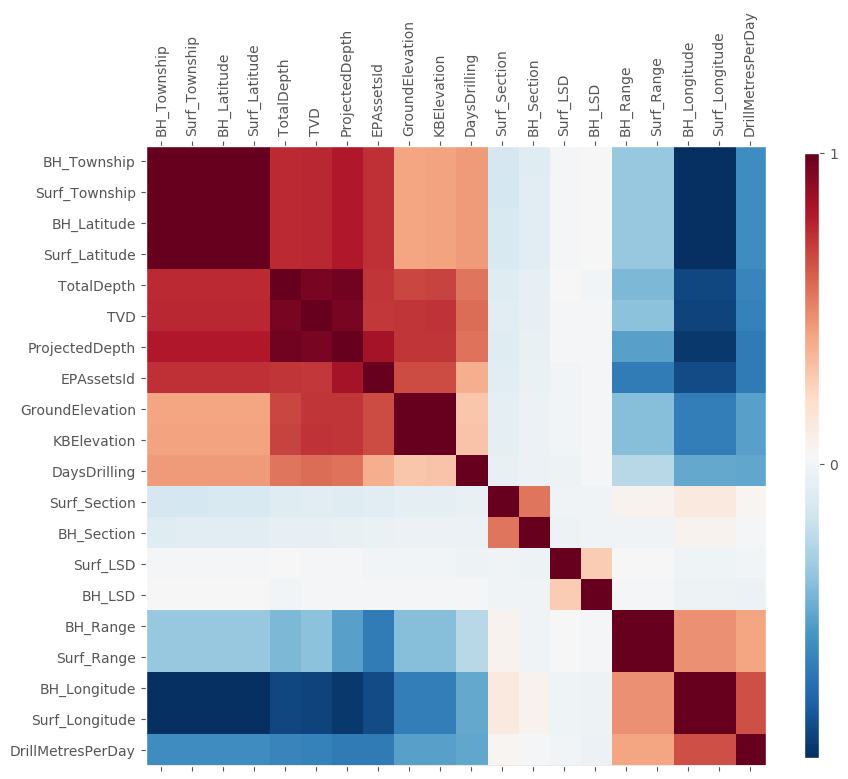

In [22]:
df = wh.loc[wh.TVD.isnull()==False, num_var]
num_corr = df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
cax = ax.matshow(num_corr, cmap=plt.cm.RdBu_r)
plt.xticks(range(len(num_corr.columns)), num_corr.columns, rotation=90)
plt.yticks(range(len(num_corr.columns)), num_corr.columns)
plt.grid(False)
cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

#### Distributions

In [23]:
def plot_hist(var): 
    plt.figure(figsize=(15,5))
    var.hist(bins=100, range=(var.min(), var.max()), density=True, alpha=0.5)
    plt.xlabel(var.name)
    plt.ylim=((0,1))

In [24]:
# Note outliers
pd.DataFrame(np.transpose([num_var, np.round(wh[num_var].max()/wh[num_var].std()), 
                           np.round(wh[num_var].min()/wh[num_var].std()), wh[num_var].isnull().sum().values]),
             columns=['num_var', 'max/std', 'min/std', 'nnan'])

,num_var,max/std,min/std,nnan
0,EPAssetsId,4,2,0
1,Surf_Township,5,1,0
2,Surf_Range,4,0,0
3,Surf_Section,3,0,0
4,Surf_LSD,3,0,0
5,Surf_Longitude,-26,-29,0
6,Surf_Latitude,40,35,0
7,BH_Longitude,-26,-29,0
8,BH_Latitude,40,35,0
9,BH_Township,5,1,0


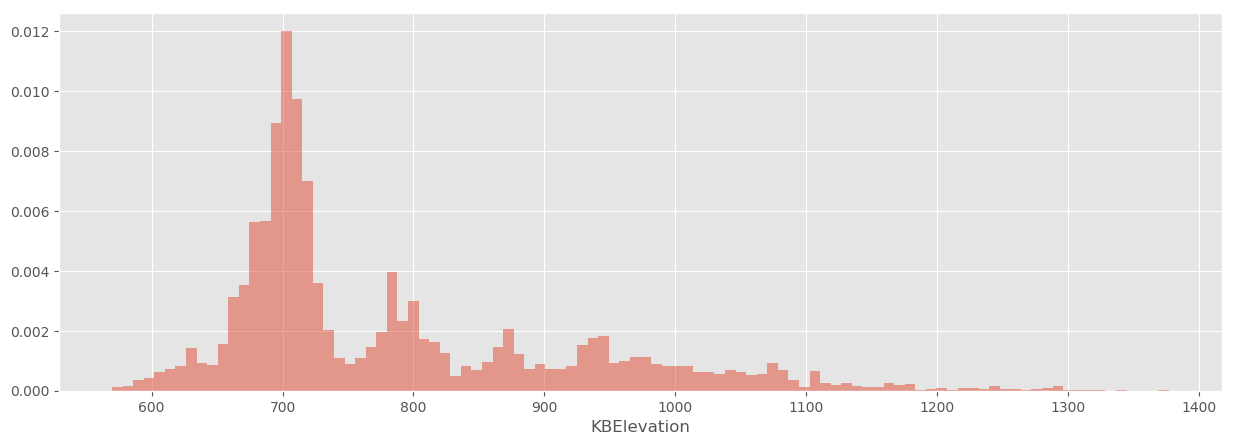

In [30]:
plot_hist(wh['KBElevation'])

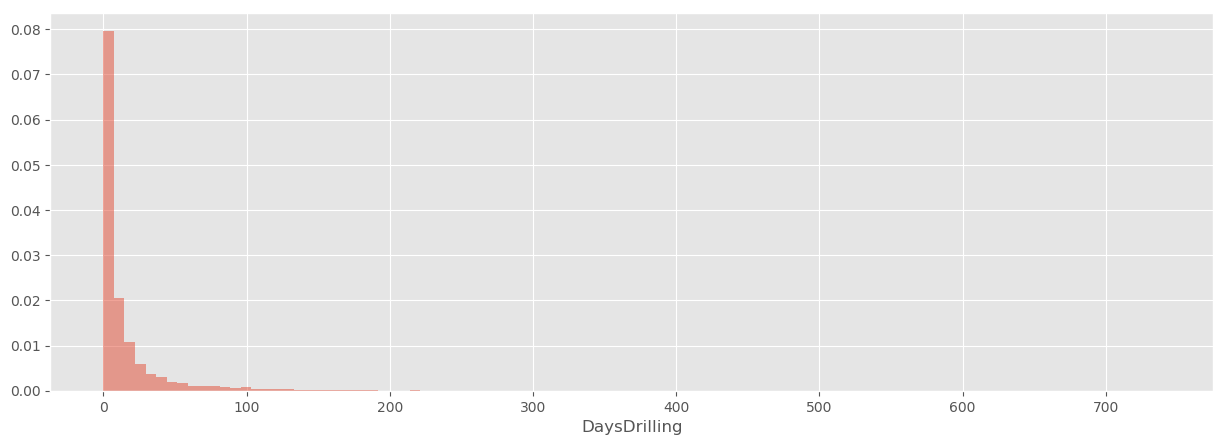

In [31]:
plot_hist(wh['DaysDrilling'])

In [33]:
wh.loc[wh['DaysDrilling']==0]

,EPAssetsId,Province,LicenceNumber,UWI,CurrentOperator,CurrentOperatorParent,CurrentOperatorParentName,Licensee,LicenseeParentCompany,LicenseeParentCompanyName,LicenceDate,CurrentStatus,CurrentStatusStandardised,WellType,WellTypeStandardised,ConfidentialReleaseDate,WellName,Formation,Field,Pool,Surf_Location,Surf_Township,Surf_Meridian,Surf_Range,Surf_Section,Surf_LSD,Surf_Longitude,Surf_Latitude,Surf_TownshipRange,Surf_QuarterSection,BH_Location,BH_TownshipRange,BH_QuarterSection,BH_Longitude,BH_Latitude,BH_Township,BH_Meridian,BH_Range,BH_Section,BH_LSD,GroundElevation,KBElevation,TotalDepth,LaheeClass,Confidential,SurfaceOwner,DrillingContractor,SpudDate,FinalDrillDate,RigReleaseDate,DaysDrilling,DrillMetresPerDay,TVD,WellProfile,RegulatoryAgency,PSACAreaCode,PSACAreaName,ProjectedDepth,StatusDate,StatusSource,UnitID,UnitName,UnitFlag,Municipality
3951,1161774,Saskatchewan,61100,101112102921W300,Baytex Energy Ltd.,102,Baytex Energy Corp.,Baytex Energy Ltd.,102,Baytex Energy Corp.,2016-08-16,Active,Active,Oil Production,Oil,2017-12-12,RAGING RIVER HZ 11-21-29-21,Viking,Avon Hill,Avon Hill Viking,03-28-029-21W3,29.0,W3,21.0,28.0,3.0,-108.900029,51.505023,029-21-W3,SW,11-21-029-21-W3,029-21-W3,NW,-108.900287,51.497566,29.0,W3,21.0,21.0,11.0,696.9,701.1,1473.0,Development,Non-Confidential,NaN,Tempco Drilling Company Inc.,2016-11-16,2016-12-11,2016-12-12,0.0,0.0,739.91,Horizontal,SKER,SK2,Southwestern Saskatchewan,745.0,2016-08-16,SKER,NaN,NaN,No,Kindersley
3953,1159677,Saskatchewan,50335,103061503021W300,Baytex Energy Ltd.,102,Baytex Energy Corp.,Baytex Energy Ltd.,102,Baytex Energy Corp.,2015-12-07,Active,Active,Oil Production,Oil,2016-03-01,RAGING RIVER EXPLORATION INC. KINDERSLEY HZ06-...,Viking,Dodsland,Dodsland Viking,14-10-030-21W3,30.0,W3,21.0,10.0,14.0,-108.877572,51.560822,030-21-W3,NW,06-15-030-21-W3,030-21-W3,SW,-108.878405,51.568054,30.0,W3,21.0,15.0,6.0,673.0,677.2,1396.0,Development,Non-Confidential,NaN,Raging River Exploration Inc.,2015-12-14,2016-01-30,2016-01-31,0.0,0.0,686.93,Horizontal,SKER,SK2,Southwestern Saskatchewan,690.0,2015-12-07,SKER,NaN,NaN,No,Kindersley
3958,1166783,Saskatchewan,79344,102112603224W300,Whitecap Resources Inc.,1606,Whitecap Resources Inc.,Whitecap Resources Inc.,1606,Whitecap Resources Inc.,2017-08-25,Active,Active,Oil Production,Oil,2017-10-07,WHITECAP HZ 11-26-32-24,Viking,Kerrobert,Kerrobert Viking,03-35-032-24W3,32.0,W3,24.0,35.0,3.0,-109.303025,51.781272,032-24-W3,SW,11-26-032-24-W3,032-24-W3,NW,-109.300178,51.773464,32.0,W3,24.0,26.0,11.0,709.0,713.1,1549.0,Development,Non-Confidential,NaN,Ensign Drilling Partnership,2017-09-06,2017-09-06,2017-09-08,0.0,0.0,737.20,Horizontal,SKER,SK2,Southwestern Saskatchewan,733.0,2017-08-25,SKER,NaN,NaN,No,Oakdale
3994,1160893,Saskatchewan,55858,102021902619W300,Baytex Energy Ltd.,102,Baytex Energy Corp.,Baytex Energy Ltd.,102,Baytex Energy Corp.,2016-05-02,Active,Active,Oil Production,Oil,2016-08-16,RAGING RIVER HZ 2-19-26-19,Viking,Plato North,Plato North Viking,10-19-026-19W3,26.0,W3,19.0,19.0,10.0,-108.640721,51.235732,026-19-W3,NE,02-19-026-19-W3,026-19-W3,SE,-108.639357,51.228242,26.0,W3,19.0,19.0,2.0,695.0,699.2,1476.0,Development,Non-Confidential,NaN,Savanna Drilling,2016-06-09,2016-07-16,2016-07-17,0.0,0.0,726.49,Horizontal,SKER,SK2,Southwestern Saskatchewan,720.0,2016-05-02,SKER,NaN,NaN,No,Snipe Lake
4030,1158307,Saskatchewan,15J224,191021002619W300,Crescent Point Resources Partnership,168,Crescent Point Energy Corp,Crescent Point Energy Corp.,168,Crescent Point Energy Corp,2015-10-26,Active,Active,Oil Production,Oil,2016-03-17,CRESCENT POINT ENERGY CORP. SNIPE LAKE HZ 02-1...,Viking,Plato North,Plato North Viking,09-10-026-19W3,26.0,W3,19.0,10.0,9.0,-108.567194,51.206675,026-19-W3,NE,02-10-026-19-W3,026-19-W3,SE,-108.569484,51.199147,26.0,W3,19.0,10.0,2.0,661.4,665.5,1454.0,Development,Non-Confidential,NaN,Savanna Drilling Corp.,2015-12-14,2016-02-15,2016-02-16,0.0,0.0,692.00,Horizontal,SKER,SK2,Southwestern Saskatchewan,690.0,2015-

In [34]:
set(wh.loc[wh.DaysDrilling==0, 'EPAssetsId']) == set(wh.loc[wh.DrillMetresPerDay==0, 'EPAssetsId'])

True

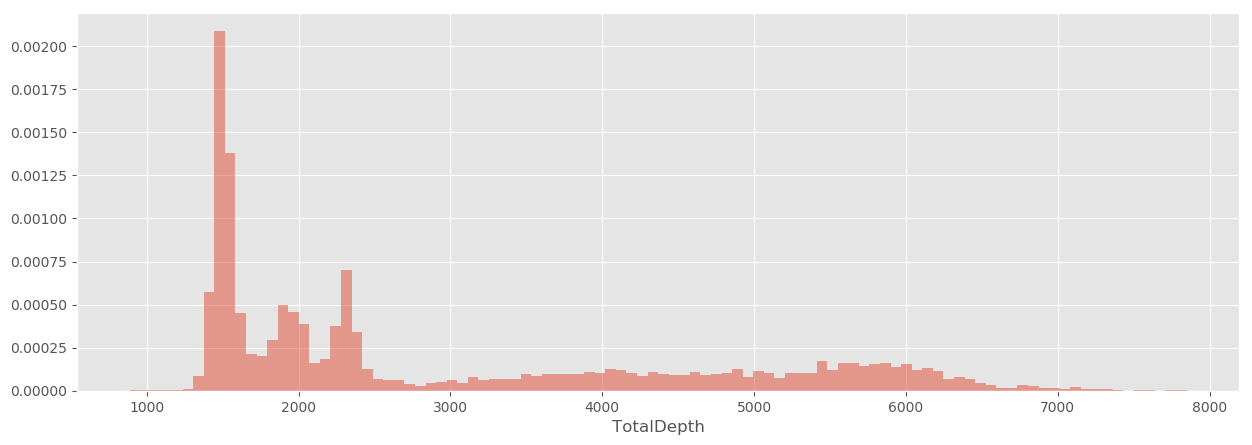

In [35]:
plot_hist(wh['TotalDepth'])

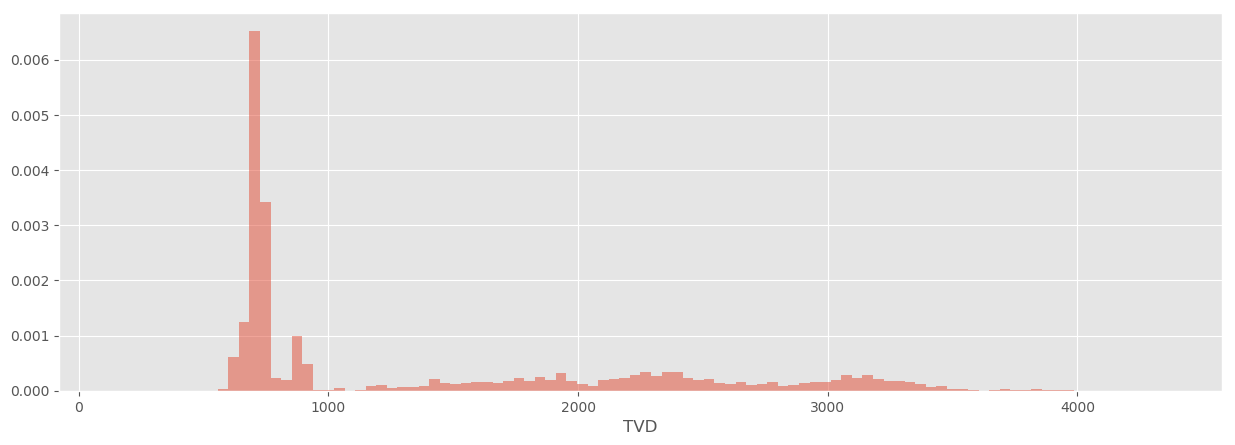

In [36]:
plot_hist(wh['TVD'])

### cat_var

#### corr

In [38]:
cat_var = datatype.loc[datatype.pdtype=='object'].index
cat_var

Index(['Province', 'LicenceNumber', 'UWI', 'CurrentOperator',
       'CurrentOperatorParent', 'CurrentOperatorParentName', 'Licensee',
       'LicenseeParentCompany', 'LicenseeParentCompanyName', 'CurrentStatus',
       'CurrentStatusStandardised', 'WellType', 'WellTypeStandardised',
       'WellName', 'Formation', 'Field', 'Pool', 'Surf_Location',
       'Surf_Meridian', 'Surf_TownshipRange', 'Surf_QuarterSection',
       'BH_Location', 'BH_TownshipRange', 'BH_QuarterSection', 'BH_Meridian',
       'LaheeClass', 'Confidential', 'SurfaceOwner', 'DrillingContractor',
       'WellProfile', 'RegulatoryAgency', 'PSACAreaCode', 'PSACAreaName',
       'StatusSource', 'UnitID', 'UnitName', 'UnitFlag', 'Municipality'],
      dtype='object')

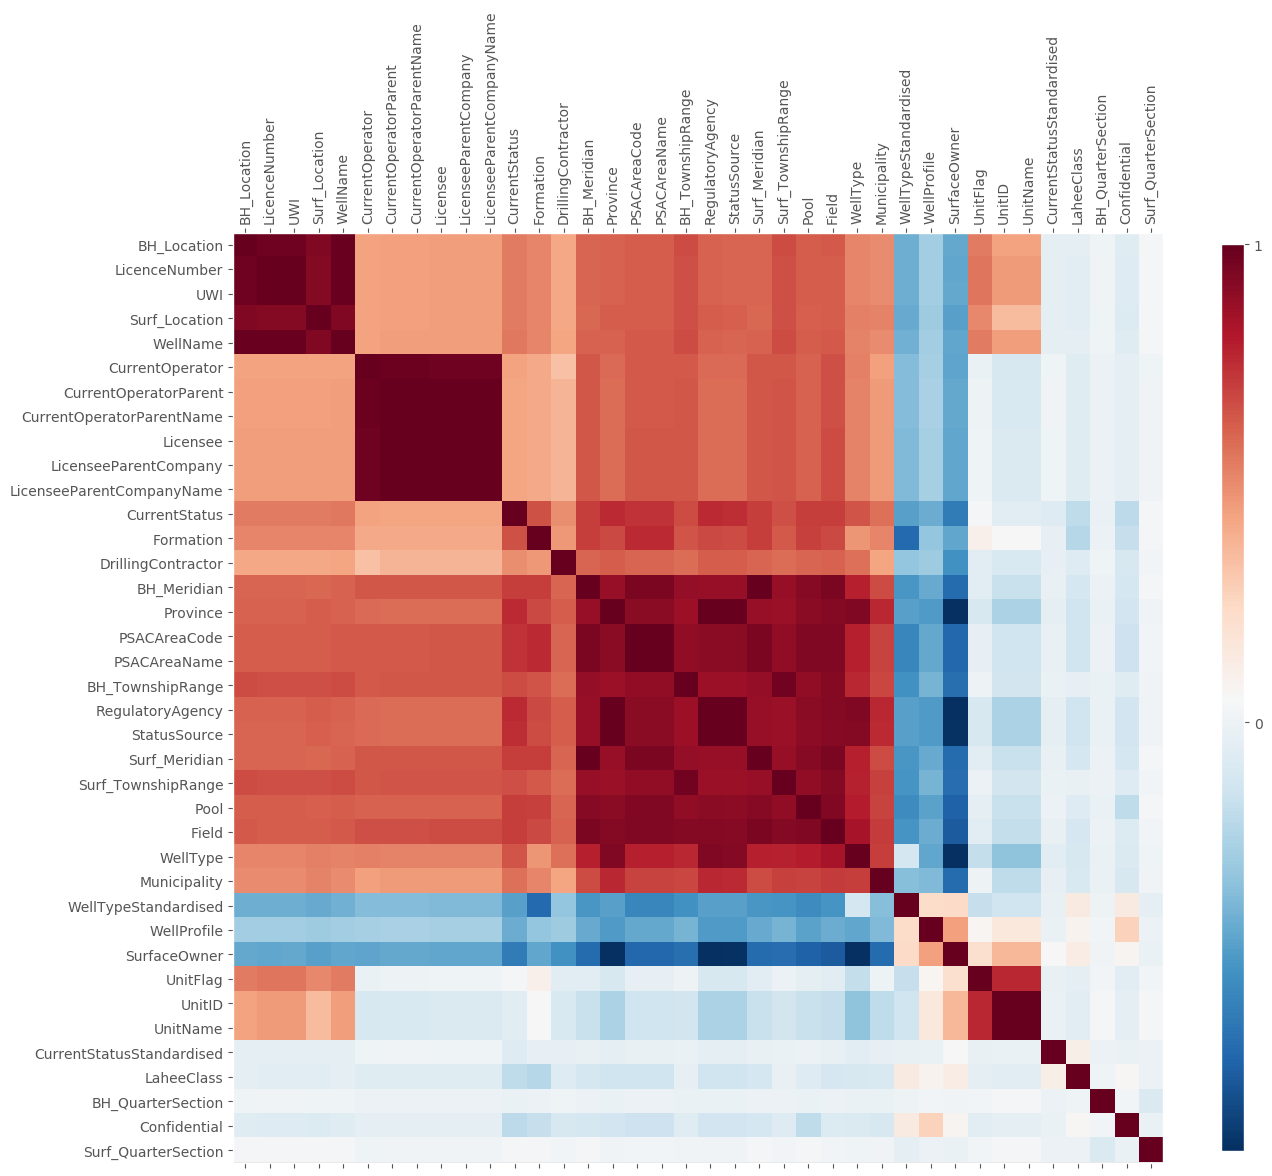

In [39]:
df = wh.loc[wh.TVD.isnull()==False, cat_var]
df = df.loc[:,df.apply(pd.Series.nunique) != 1]
cat_corr = df.apply(lambda x : pd.factorize(x)[0]).corr(method='pearson', min_periods=1)
fig, ax = plt.subplots(figsize=(15, 15))
cax = ax.matshow(cat_corr, cmap=plt.cm.RdBu_r)
plt.xticks(range(len(cat_corr.columns)), cat_corr.columns, rotation=90)
plt.yticks(range(len(cat_corr.columns)), cat_corr.columns)
plt.grid(False)
cbar = fig.colorbar(cax, ticks=[-1, 0, 1], aspect=40, shrink=.8)

#### Distributions

In [40]:
datatype.loc[datatype['pdtype']=='object']

,pdtype,nunique,nnan
Province,object,2,0
LicenceNumber,object,8687,0
UWI,object,8694,0
CurrentOperator,object,106,0
CurrentOperatorParent,object,104,0
CurrentOperatorParentName,object,104,0
Licensee,object,103,0
LicenseeParentCompany,object,103,0
LicenseeParentCompanyName,object,103,0
CurrentStatus,object,5,0


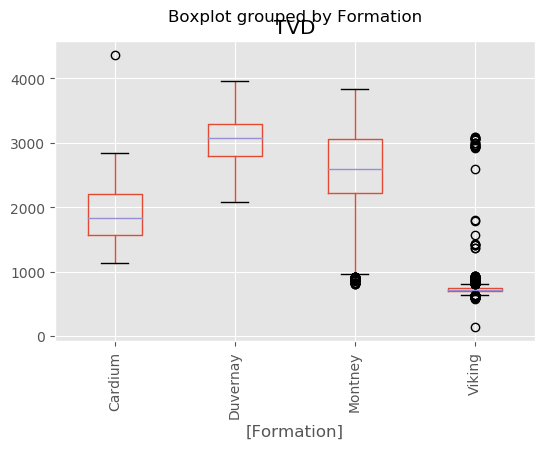

In [62]:
wh[['Formation', 'TVD']].boxplot(by='Formation')
plt.xticks(rotation=90)
plt.show()

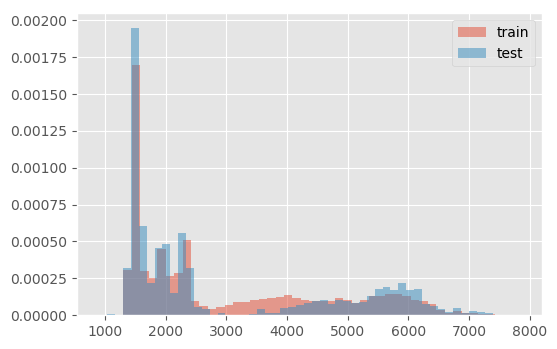

In [63]:
df = wh[['TVD', 'TotalDepth']].copy(deep=True)
plt.hist(df.loc[df.TVD.isnull()==False, 'TotalDepth'], density=True, bins=50, alpha=0.5, label='train')
plt.hist(df.loc[df.TVD.isnull()==True, 'TotalDepth'], density=True, bins=50, alpha=0.5, label='test')
plt.legend()
plt.show()

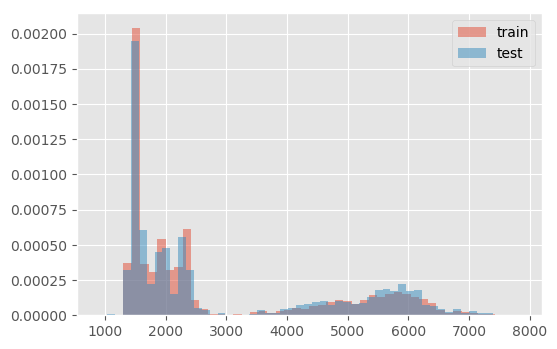

In [64]:
# Remove Cardium, train-test distributions more similar
df = wh.loc[((wh.Formation=='Montney')|(wh.Formation=='Duvernay')|(wh.Formation=='Viking')), ['TVD', 'TotalDepth']].copy(deep=True)
plt.hist(df.loc[df.TVD.isnull()==False, 'TotalDepth'], density=True, bins=50, alpha=0.5, label='train')
plt.hist(df.loc[df.TVD.isnull()==True, 'TotalDepth'], density=True, bins=50, alpha=0.5, label='test')
plt.legend()
plt.show()

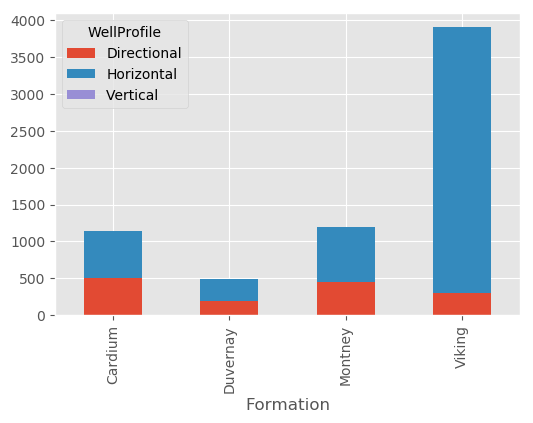

In [59]:
# Train set
df = wh.loc[wh.TVD.isnull()==False, ['Formation', 'WellProfile']]
df = df.groupby(['Formation', 'WellProfile'])['Formation'].count().unstack('WellProfile')
df[df.columns.values].plot(kind='bar', stacked=True)

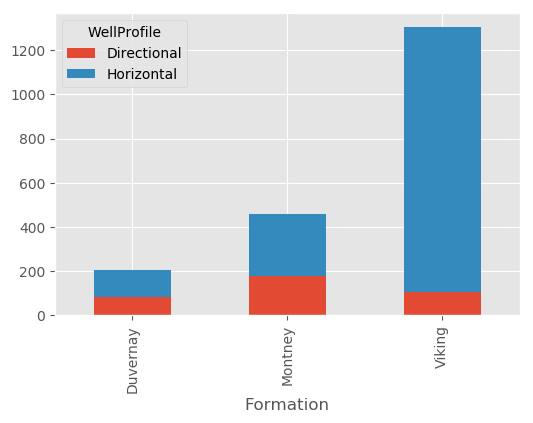

In [60]:
# Test set
df = wh.loc[wh.TVD.isnull(), ['Formation', 'WellProfile']]
df = df.groupby(['Formation', 'WellProfile'])['Formation'].count().unstack('WellProfile')
df[df.columns.values].plot(kind='bar', stacked=True)

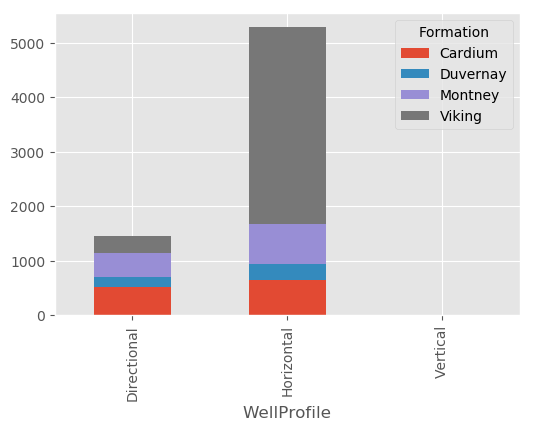

In [45]:
# Train set
df = wh.loc[wh.TVD.isnull()==False, ['Formation', 'WellProfile']]
df = df.groupby(['WellProfile', 'Formation'])['WellProfile'].count().unstack('Formation')
df[df.columns.values].plot(kind='bar', stacked=True)

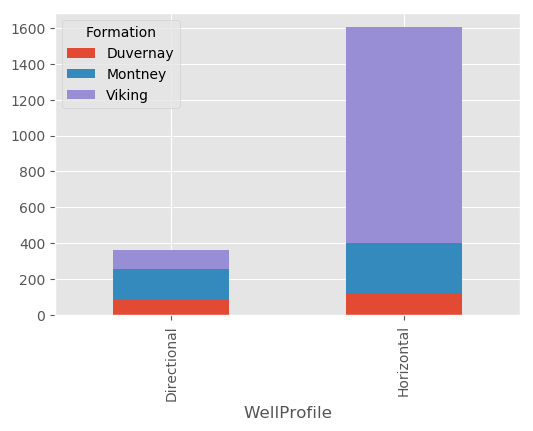

In [46]:
# Test set
df = wh.loc[wh.TVD.isnull(), ['Formation', 'WellProfile']]
df = df.groupby(['WellProfile', 'Formation'])['WellProfile'].count().unstack('Formation')
df[df.columns.values].plot(kind='bar', stacked=True)

Text(0.5, 0, 'TVD')

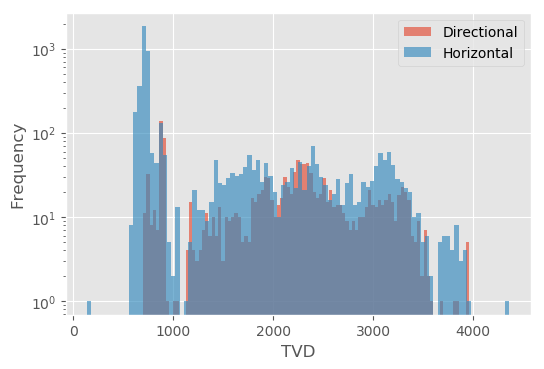

In [47]:
wh[wh.WellProfile!='Vertical'].groupby('WellProfile')['TVD'].plot(kind='hist', alpha=0.65, legend=True, bins=100, logy=True)
plt.xlabel('TVD')

Cardium          AxesSubplot(0.1,0.559091;0.363636x0.340909)
Duvernay    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Montney              AxesSubplot(0.1,0.15;0.363636x0.340909)
Viking          AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

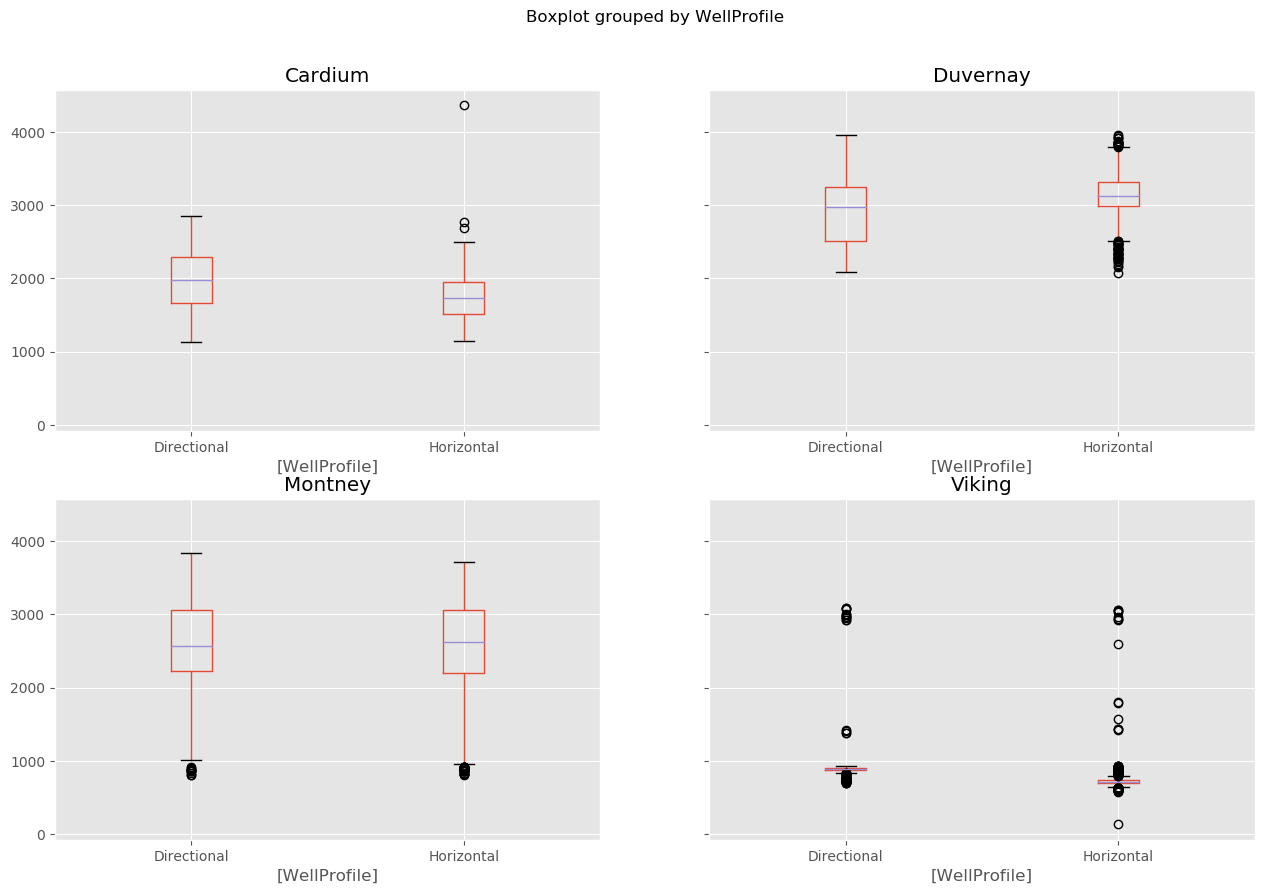

In [51]:
wh.loc[wh.WellProfile!='Vertical', 
       ['Formation', 'WellProfile', 'TVD']].groupby(['Formation']).boxplot(by='WellProfile', figsize=(15,10))

Cardium          AxesSubplot(0.1,0.559091;0.363636x0.340909)
Duvernay    AxesSubplot(0.536364,0.559091;0.363636x0.340909)
Montney              AxesSubplot(0.1,0.15;0.363636x0.340909)
Viking          AxesSubplot(0.536364,0.15;0.363636x0.340909)
dtype: object

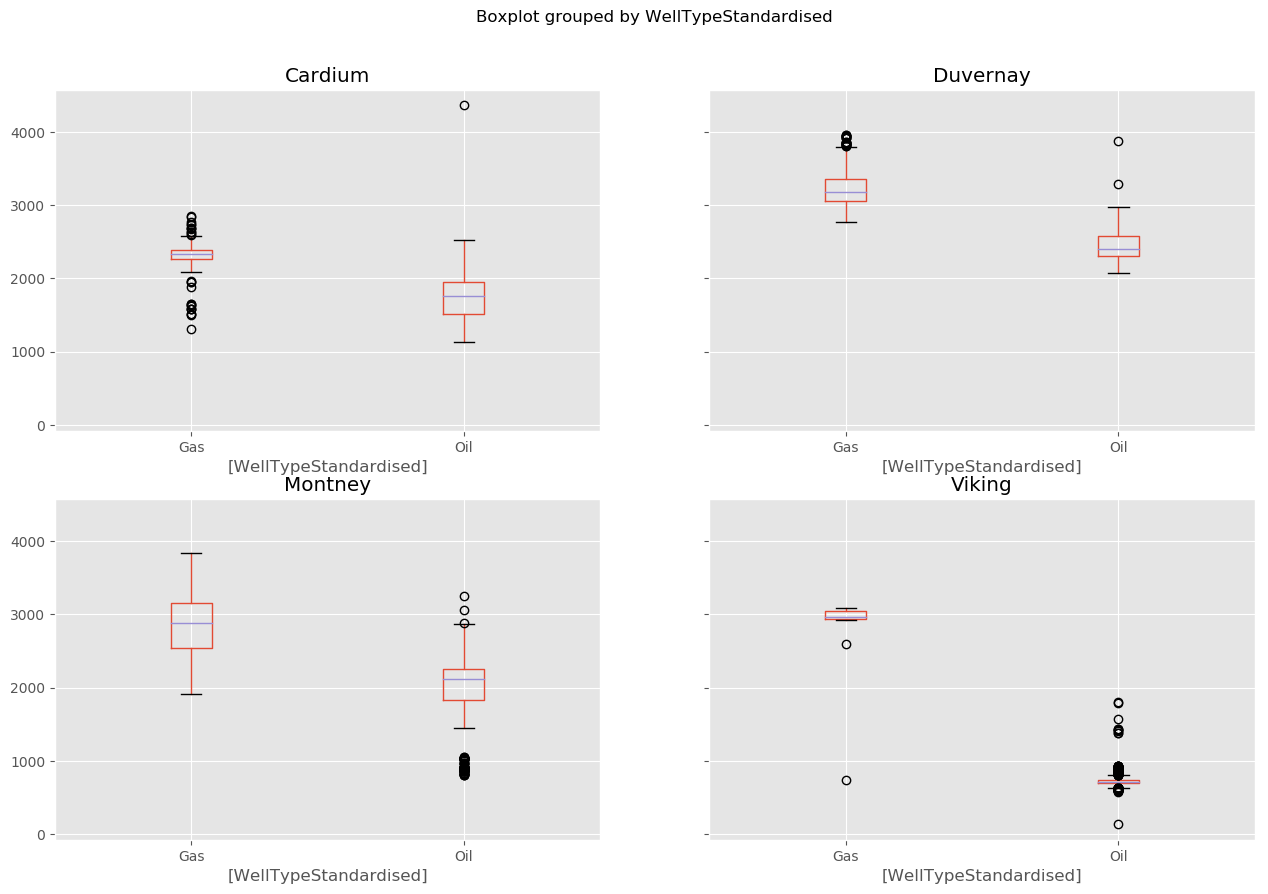

In [53]:
wh.loc[wh.WellProfile!='Vertical', 
       ['Formation', 'WellTypeStandardised', 'TVD']].groupby(['Formation']).boxplot(by='WellTypeStandardised', figsize=(15,10))

### Fill NA

#### cat_var

In [61]:
for var in cat_var: 
    if wh[var].isnull().sum()>0: 
        print(var, wh[var].isnull().sum())

Pool 193
SurfaceOwner 4108
DrillingContractor 4
UnitID 7729
UnitName 7729
Municipality 4586


In [62]:
for var in ['Pool', 'SurfaceOwner', 'DrillingContractor', 'UnitID', 'UnitName', 'Municipality']:
    wh[var] = wh[var].fillna('Unspecified')

#### num_var and datetime_var

In [63]:
for var in wh.columns: 
    if wh[var].dtypes!='object' and wh[var].isnull().sum()>0: 
        print(var, wh[var].isnull().sum())

ConfidentialReleaseDate 2960
TVD 1963
ProjectedDepth 386


In [64]:
for var in num_var: 
    if (wh[var]==0).sum() > 0: 
        print (var, (wh[var]==0).sum())

DaysDrilling 36
DrillMetresPerDay 36


##### ProjectedDepth

In [65]:
# train set
print(wh.loc[(wh.TVD.isnull()==False) & (wh.ProjectedDepth.isnull())].shape[0])
# test set
print(wh.loc[(wh.TVD.isnull()) & (wh.ProjectedDepth.isnull())].shape[0])

307
79


In [66]:
# Fill with TotalDepth
wh.loc[wh.ProjectedDepth.isnull(), 'ProjectedDepth'] = wh.loc[wh.ProjectedDepth.isnull(), 'TotalDepth']
# Sanity check
wh.loc[wh.ProjectedDepth.isnull(), 'EPAssetsId'].nunique()

0

##### DaysDrilling and DrillMetresPerDay

In [67]:
set(wh.loc[wh.DaysDrilling==0, 'EPAssetsId'])==set(wh.loc[wh.DrillMetresPerDay==0, 'EPAssetsId'])

True

In [68]:
# train set
print(wh.loc[(wh.TVD.isnull()==False) & (wh.DrillMetresPerDay==0) & (wh.TotalDepth>0)].shape[0])
# test set
print(wh.loc[(wh.TVD.isnull()) & (wh.DrillMetresPerDay==0) & (wh.TotalDepth>0)].shape[0])

31
5


In [69]:
# Leave DaysDrilling==0 as is, fill DrillMetresPerDay==0 with TD
wh.loc[wh.DaysDrilling==0, 'DrillMetresPerDay'] = wh.loc[wh.DaysDrilling==0, 'TotalDepth']

In [70]:
# Sanity check
print(wh.loc[wh.DaysDrilling==0, 'EPAssetsId'].nunique())
print(wh.loc[wh.DrillMetresPerDay==0, 'EPAssetsId'].nunique())

36
0


### Export

In [71]:
wh.to_csv('wh_cleaned.csv', index=False)

## Perf

In [136]:
path='../'
perf = pd.read_csv(path+'PerfTreatments.csv', memory_map=True)
print(perf.shape)
perf.head()

(445271, 9)


,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots,WellHeader.Match
0,2598013,3679026,2.0,2017-01-19 00:00:00.000,Perforation,2263.0,2263.5,20.0,Yes
1,2599020,3680087,2.0,2017-01-18 00:00:00.000,Perforation,1435.0,1435.5,20.0,Yes
2,2585063,3681132,2.0,2015-02-14 00:00:00.000,Perforation,1794.0,1794.5,20.0,Yes
3,2589680,3682967,2.0,2015-11-08 00:00:00.000,Perforation,1878.0,1878.5,20.0,Yes
4,2590441,3695025,2.0,2016-08-09 00:00:00.000,Perforation,1957.0,1957.5,20.0,Yes


In [137]:
perf.drop(['WellHeader.Match'], axis=1, inplace=True)
perf['ActivityDate'] = pd.to_datetime(perf['ActivityDate'],
                                      format='%Y-%m-%d %H:%M:%S')

In [138]:
# Only keep wells in header
perf = perf[perf.EPAssetsId.isin(keep_rows)]
perf = perf.sort_values(['EPAssetsId', 'ObservationNumber'])
perf.head()

,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots
277164,1145472,1178016,NaN,2015-02-22,Chemical Fracture,835.0,1510.5,NaN
276671,1145481,1011838,NaN,2015-01-22,Chemical Fracture,1256.5,1257.0,NaN
276688,1145481,1017355,NaN,2015-01-22,Chemical Fracture,940.5,941.0,NaN
276701,1145481,1020802,NaN,2015-01-22,Chemical Fracture,1120.0,1120.5,NaN
276703,1145481,1021489,NaN,2015-01-22,Chemical Fracture,1290.0,1290.5,NaN


In [139]:
print('wh:', len(set(wh.EPAssetsId)))
print('perf:', len(set(perf.EPAssetsId)))
set(perf.EPAssetsId).issubset(set(wh.EPAssetsId))

wh: 8694
perf: 8415


True

In [140]:
print('sm:', len(set(sm.EPAssetsId)))
print('perf:', len(set(perf.EPAssetsId)))
set(sm.EPAssetsId).issubset(set(perf.EPAssetsId))

sm: 1963
perf: 8415


False

In [141]:
pd.DataFrame(np.vstack((perf.columns, perf.nunique(), perf.isnull().sum(), perf.dtypes))).T.rename(columns={0: 'columns', 1:'nunique', 2: 'nnan', 3:'dtypes'})

,columns,nunique,nnan,dtypes
0,EPAssetsId,8415,0,int64
1,EPAPTId,376653,0,int64
2,ObservationNumber,686,5934,float64
3,ActivityDate,1830,0,datetime64[ns]
4,ActivityType,18,0,object
5,IntervalTop,52870,0,float64
6,IntervalBase,54848,0,float64
7,PerfShots,29,5934,float64


### Fill NA

#### ObservationNumber

* A lot of things depends on ObservationNumber, so its NaN must be filled first

In [142]:
# Are wells with NaN ObservationNumber separated from the rest? Yes
set(perf.loc[perf.ObservationNumber.isnull(), 'EPAssetsId']).intersection(set(perf.loc[perf.ObservationNumber.isnull()==False, 'EPAssetsId']))

set()

In [143]:
# Impute NaN as range(EPAPTId.nunique())+1
df = perf.copy(deep=True)
temp = []
for well, df_well in df.groupby('EPAssetsId'): 
    if df_well.ObservationNumber.isnull().sum()>0: 
        temp = np.append(temp, np.arange(df_well.EPAPTId.nunique()) + 1)
    else: 
        temp = np.append(temp, df_well['ObservationNumber'])
perf['ObservationNumber'] = temp
perf

,EPAssetsId,EPAPTId,ObservationNumber,ActivityDate,ActivityType,IntervalTop,IntervalBase,PerfShots
277164,1145472,1178016,1.0,2015-02-22,Chemical Fracture,835.0,1510.5,NaN
276671,1145481,1011838,1.0,2015-01-22,Chemical Fracture,1256.5,1257.0,NaN
276688,1145481,1017355,2.0,2015-01-22,Chemical Fracture,940.5,941.0,NaN
276701,1145481,1020802,3.0,2015-01-22,Chemical Fracture,1120.0,1120.5,NaN
276703,1145481,1021489,4.0,2015-01-22,Chemical Fracture,1290.0,1290.5,NaN
...,...,...,...,...,...,...,...,...
346457,2625908,4075345,160.0,2020-01-18,Multi-Stage Fracture,2874.4,2874.5,0.0
347777,2625908,4075346,161.0,2020-01-18,Multi-Stage Fracture,2855.2,2855.3,0.0
347449,2625908,4075347,162.0,2020-01-18,Multi-Stage Fracture,2835.4,2835.5,0.0
347193,2625908,4075348,163.0,2020-01-18,Multi-Stage Fracture,2817.1,2817.2,0.0


#### PerfShots

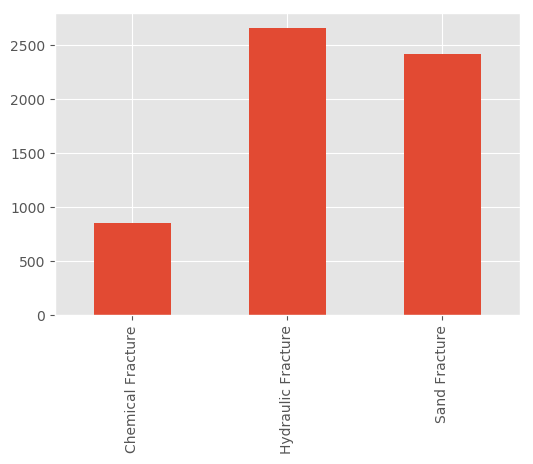

In [144]:
perf.loc[perf.PerfShots.isnull(), 'ActivityType'].value_counts().sort_index().plot(kind='bar')

In [145]:
perf['PerfShots'] = perf['PerfShots'].fillna(0)

### Distributions

1.0
686.0


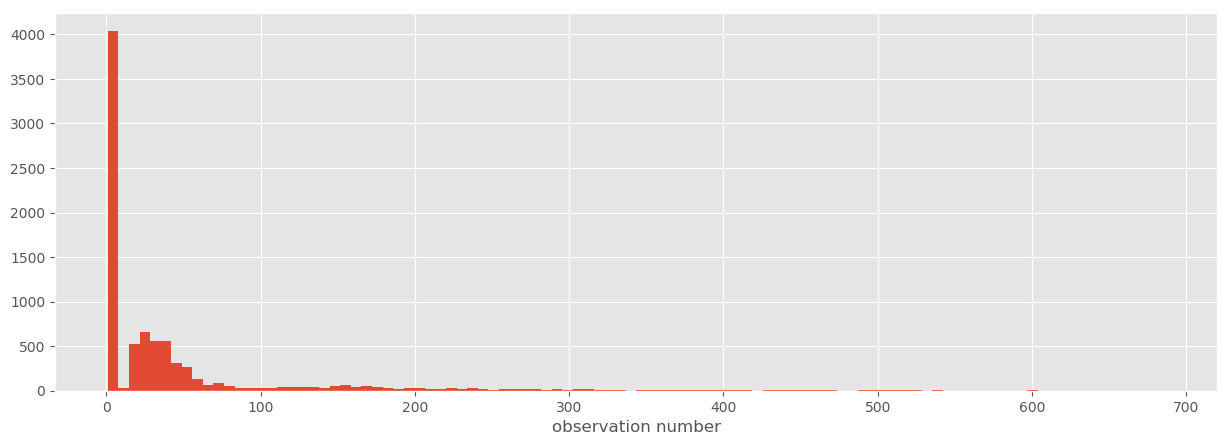

In [146]:
# Max observation number per well (number of events per well)
perf.groupby('EPAssetsId')['ObservationNumber'].nunique().hist(bins=100, figsize=(15,5))
plt.xlabel('observation number')
print(perf.groupby('EPAssetsId').ObservationNumber.max().min())
print(perf.groupby('EPAssetsId').ObservationNumber.max().max())

1     3701
2     1681
3      373
4      175
5      125
6      107
7      115
8      122
9      106
10      91
Name: CompletionDuration, dtype: int64


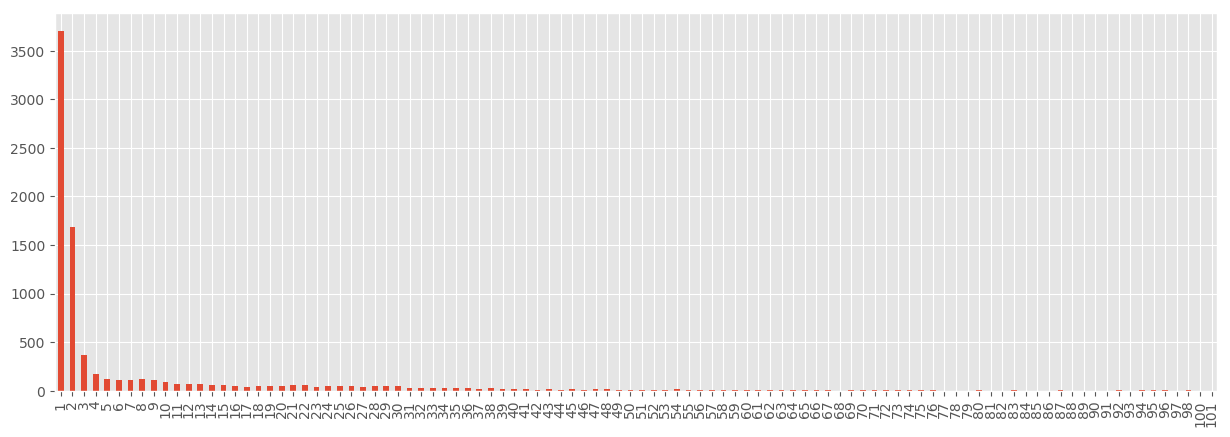

In [147]:
# Completion duration (days)
df = pd.DataFrame(perf.groupby('EPAssetsId')['ActivityDate'].apply(lambda x: (max(x) - min(x))))
df.rename(columns={'ActivityDate': 'CompletionDuration'}, inplace=True)
df['CompletionDuration'] = df['CompletionDuration'].dt.days + 1
df['CompletionDuration'].value_counts().sort_index()[:100].plot(kind='bar', figsize=(15,5))
print(df['CompletionDuration'].value_counts().sort_index()[:10])

Acid Treatment                          2538
Bridge Plug - No Cement                    1
Casing Patch                               3
Cement Plug                                1
Cement Squeeze                            13
Chemical Fracture                        858
Chemical Squeeze                           1
Fracture                               35573
Hydra Jet Perforation                   1915
Hydraulic Fracture                      2659
Multi-Stage Fracture                  126057
Multi-Stage Fracture - Port Closed        17
Open Hole/Barefoot Completion           1049
Packing Device Capped w/Cement             1
Perforation                           203541
Remedial Casing Cementing                  7
Sand Fracture                           2417
Slotted Liner                              2
Name: ActivityType, dtype: int64


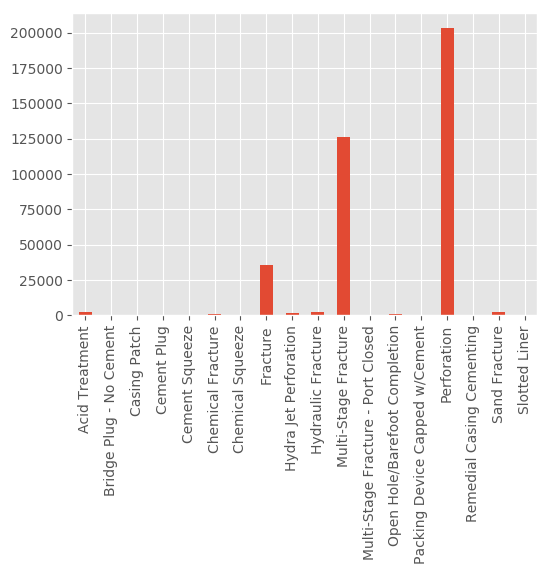

In [148]:
# Completion types
perf['ActivityType'].value_counts().sort_index().plot(kind='bar')
print(perf.ActivityType.value_counts().sort_index())

In [149]:
# PerfShots correspond to
perf.loc[perf.PerfShots!=0, 'ActivityType'].unique()

array(['Perforation'], dtype=object)

1    5967
2    1900
3     426
4     118
5       4
Name: ActivityType, dtype: int64


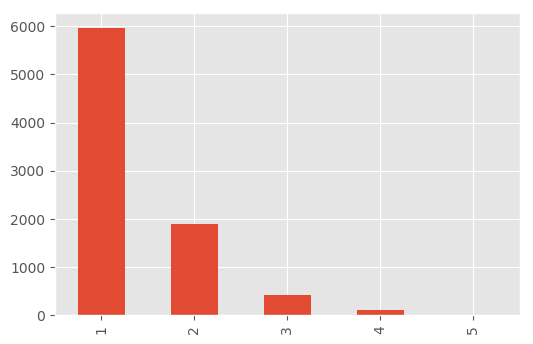

In [150]:
# Number of activity type per well
perf.groupby('EPAssetsId')['ActivityType'].nunique().value_counts().sort_index().plot(kind='bar')
print(perf.groupby('EPAssetsId')['ActivityType'].nunique().value_counts().sort_index())

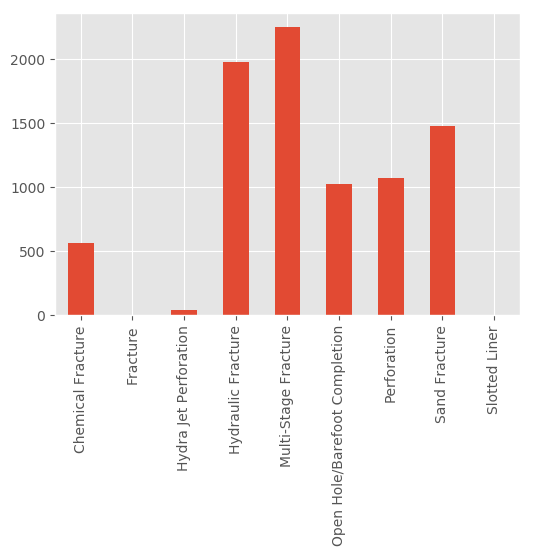

In [152]:
# First activity type
perf.loc[perf['ObservationNumber']==1, 'ActivityType'].value_counts().sort_index().plot(kind='bar')

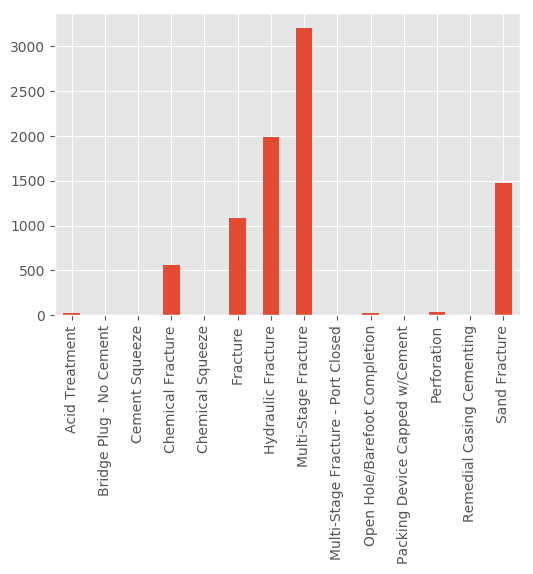

In [153]:
# Last activity type
perf.groupby('EPAssetsId').apply(lambda df: df[df['ObservationNumber'] == df['ObservationNumber'].max()])[
    'ActivityType'].value_counts().sort_index().plot(kind='bar')

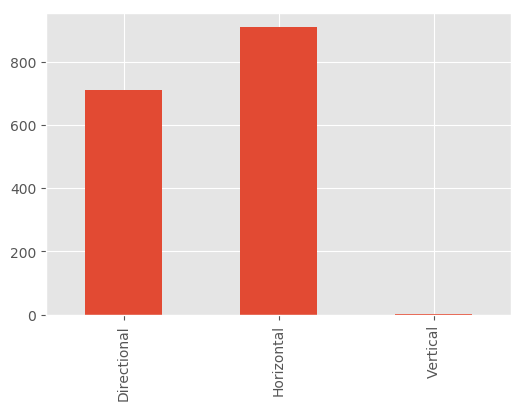

In [203]:
# Perforation or Hydra Jet Perforation is the only ActivityType
mask1 = perf.EPAssetsId.isin((perf.groupby('EPAssetsId')['ActivityType'].nunique()==1).index)
mask2 = perf.ActivityType.isin(['Perforation', 'Hydra Jet Perforation'])
wh.loc[wh.EPAssetsId.isin(perf.loc[(mask1)&(mask2), 'EPAssetsId'].unique()), 'WellProfile'].value_counts().sort_index().plot(kind='bar')

In [154]:
# Name of ActivityType containing perforation (case insensitive)
import re
for type in perf['ActivityType'].unique(): 
    list = re.findall(r"[\w']+", type)
    if 'perforation' in [x.lower() for x in list]: 
        print(type)

Perforation
Hydra Jet Perforation


In [155]:
perf.groupby('EPAssetsId').apply(lambda df: df[df['ActivityType']=='Perforation'])

EPAssetsId  EPAPTId  ObservationNumber ActivityDate  \
EPAssetsId                                                              
2573712    14274     2573712  5429455                1.0   2015-03-10   
           430       2573712  5429456                2.0   2015-03-10   
           5167      2573712  5429457                3.0   2015-03-10   
           9164      2573712  5429458                4.0   2015-03-10   
           10458     2573712  5429460                6.0   2015-03-12   
...                      ...      ...                ...          ...   
2624111    15240     2624111  3836638               24.0   2020-01-11   
           16760     2624111  3836639               25.0   2020-01-11   
           15746     2624111  3836640               26.0   2020-01-11   
           16224     2624111  3836641               27.0   2020-01-11   
           17882     2624111  3836642               28.0   2020-01-11   

                 ActivityType  IntervalTop  IntervalBase  PerfShots  
EPAssetsId                                                           
2573712    14274  Perforation       5624.0        5624.5       20.0  
           430    Perforation       5609.0        5609.5       20.0  
           5167   Perforation       5594.0        5594.5       20.0  
           9164   Perforation       5579.0        5579.5       20.0  
           10458  Perforation       5563.5        5564.0       20.0  
...                       ...          ...           ...        ...  
2624111    15240  Perforation       1223.0        1223.5       20.0  
           16760  Perforation       1188.0        1188.5       20.0  
           15746  Perforation       1153.0        1153.5       20.0  
           16224  Perforation       1119.0        1119.5       20.0  
           17882  Perforation       1084.0        1084.5       20.0  

[203541 rows x 8 columns]

In [156]:
perf.groupby('EPAssetsId').apply(lambda df: df[df['ActivityType']=='Hydra Jet Perforation'])

EPAssetsId  EPAPTId  ObservationNumber ActivityDate  \
EPAssetsId                                                               
2586717    278107     2586717  5512822                1.0   2015-08-29   
2586856    278104     2586856  4779295                1.0   2015-10-24   
           279380     2586856  4779299                5.0   2015-10-25   
2586857    279381     2586857  4790393                2.0   2015-09-12   
           279382     2586857  4790397                6.0   2015-10-14   
...                       ...      ...                ...          ...   
2616901    278118     2616901  5829291                1.0   2018-10-23   
           279416     2616901  5829292                2.0   2018-10-23   
2619862    279517     2619862  5997910               15.0   2019-07-22   
           279518     2619862  5997911               16.0   2019-07-22   
           279519     2619862  5997912               17.0   2019-07-22   

                            ActivityType  IntervalTop  IntervalBase  PerfShots  
EPAssetsId                                                                      
2586717    278107  Hydra Jet Perforation       5488.4        5488.7        0.0  
2586856    278104  Hydra Jet Perforation       3987.2        3987.3        0.0  
           279380  Hydra Jet Perforation       3799.0        3799.1        0.0  
2586857    279381  Hydra Jet Perforation       4140.3        4140.4        0.0  
           279382  Hydra Jet Perforation       3957.3        3957.4        0.0  
...                                  ...          ...           ...        ...  
2616901    278118  Hydra Jet Perforation       4720.0        4720.2        0.0  
           279416  Hydra Jet Perforation       4707.0        4707.2        0.0  
2619862    279517  Hydra Jet Perforation       5436.0        5436.1        0.0  
           279518  Hydra Jet Perforation       5362.6        5362.7        0.0  
           279519  Hydra Jet Perforation       5276.3        5276.4        0.0  

[1915 rows x 8 columns]

### Export

In [157]:
perf.to_csv('perf_cleaned.csv', index=False)

## Production

In [10]:
path='../'
prod = pd.read_csv(path+'WellProduction.csv', memory_map=True)
print(prod.shape)
prod.head()

(961054, 5)


,EPAssetsId,ProdPeriod,ProdType,Volume,WellHeader.Match
0,1159612,2019-12-31 00:00:00.000,Production Hours,744.0,Yes
1,1166272,2019-12-31 00:00:00.000,Production Hours,744.0,Yes
2,1172352,2019-12-31 00:00:00.000,Production Hours,744.0,Yes
3,1152904,2019-12-31 00:00:00.000,Production Hours,744.0,Yes
4,1160926,2019-12-31 00:00:00.000,Production Hours,744.0,Yes


In [11]:
prod.drop(['WellHeader.Match'], axis=1, inplace=True)
prod['ProdPeriod'] = pd.to_datetime(prod['ProdPeriod'], 
                                          format='%Y-%m-%d %H:%M:%S')

In [12]:
# Only keep wells in header
prod = prod[prod.EPAssetsId.isin(keep_rows)]
prod = prod.sort_values(['EPAssetsId', 'ProdPeriod', 'ProdType'])
prod.head()

,EPAssetsId,ProdPeriod,ProdType,Volume
875043,1145472,2015-03-31,Gas Production (MMcf),0.377868
649226,1145472,2015-03-31,Oil Production (Bbls),1326.518820
78498,1145472,2015-03-31,Production Hours,744.000000
328657,1145472,2015-03-31,Water Production (Bbls),410.723940
874842,1145472,2015-04-30,Gas Production (MMcf),0.250735


In [13]:
print('wh:', len(set(wh.EPAssetsId)))
print('prod:', len(set(prod.EPAssetsId)))
set(prod.EPAssetsId).issubset(set(wh.EPAssetsId))

wh: 8694
prod: 8661


True

In [14]:
print('sm:', len(set(sm.EPAssetsId)))
print('prod:', len(set(prod.EPAssetsId)))
set(sm.EPAssetsId).issubset(set(prod.EPAssetsId))

sm: 1963
prod: 8661


False

In [15]:
# Duplicates in ProdPeriod are summed, if skipping this step, duplicates will be averaged after pivot_table
prod = prod.groupby(['EPAssetsId', 'ProdPeriod', 'ProdType']).Volume.sum().reset_index()
# Sanity check
prod.loc[prod.EPAssetsId==1164075]

,EPAssetsId,ProdPeriod,ProdType,Volume
290265,1164075,2017-05-31,Gas Production (MMcf),0.003531
290266,1164075,2017-05-31,Oil Production (Bbls),213.853200
290267,1164075,2017-05-31,Production Hours,196.000000
290268,1164075,2017-06-30,Gas Production (MMcf),0.031783
290269,1164075,2017-06-30,Oil Production (Bbls),766.726620
290270,1164075,2017-06-30,Production Hours,720.000000
290271,1164075,2017-07-31,Gas Production (MMcf),0.028252
290272,1164075,2017-07-31,Oil Production (Bbls),450.349680
290273,1164075,2017-07-31,Production Hours,744.000000
290274,1164075,2017-08-31,Gas Production (MMcf),0.045909


In [16]:
# Sanity check
prod[(prod.ProdType=='Production Hours')&(prod.Volume>31*24)]

,EPAssetsId,ProdPeriod,ProdType,Volume


In [17]:
prod.replace(to_replace=['Production Hours', 'Condensate Production (Bbls)',
                         'Gas Production (MMcf)', 'Oil Production (Bbls)',
                         'Water Production (Bbls)'],
             value=['Duration', 'Condensate', 'Gas', 'Oil', 'Water'], inplace=True)

prod = prod.pivot_table(index=['EPAssetsId', 'ProdPeriod'], columns='ProdType', values='Volume')
prod.columns.names = [None]
prod.reset_index(inplace=True)
prod.head(100)

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
0,1145472,2015-03-31,NaN,744.0,0.377868,1326.51882,410.72394
1,1145472,2015-04-30,NaN,720.0,0.250735,1271.79756,301.28142
2,1145472,2015-05-31,NaN,744.0,0.618009,1074.29784,120.13518
3,1145472,2015-06-30,NaN,720.0,0.370805,681.81432,84.28332
4,1145472,2015-07-31,NaN,744.0,0.229546,639.04368,88.68618
5,1145472,2015-08-31,NaN,744.0,0.293113,578.03262,73.59066
6,1145472,2015-09-30,NaN,720.0,0.342554,565.45302,83.65434
7,1145472,2015-10-31,NaN,744.0,0.250735,510.73176,62.26902
8,1145472,2015-11-30,NaN,720.0,0.215420,363.55044,39.62574
9,1145472,2015-12-31,NaN,744.0,0.218952,415.12680,50.94738


In [18]:
# Sanity check
prod.loc[prod.EPAssetsId==1164075]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
80068,1164075,2017-05-31,NaN,196.0,0.003531,213.85320,NaN
80069,1164075,2017-06-30,NaN,720.0,0.031783,766.72662,NaN
80070,1164075,2017-07-31,NaN,744.0,0.028252,450.34968,NaN
80071,1164075,2017-08-31,NaN,744.0,0.045909,356.00268,NaN
80072,1164075,2017-09-30,NaN,720.0,0.038846,240.27036,360.40554
80073,1164075,2017-10-31,NaN,722.0,0.038846,291.84672,612.62652
80074,1164075,2017-11-30,NaN,720.0,0.010594,202.53156,735.90660
80075,1164075,2017-12-31,NaN,744.0,0.162448,309.45816,337.76226
80076,1164075,2018-01-31,NaN,744.0,0.173043,186.80706,715.77924
80077,1164075,2018-02-28,NaN,672.0,0.067098,154.10010,325.18266


In [19]:
# Sum before pivot_table
datatype = pd.DataFrame(prod.dtypes, columns=['pdtype'])
datatype['nunique'] = prod.nunique()
datatype['nnan'] = np.sum(prod.isna())
datatype

,pdtype,nunique,nnan
EPAssetsId,int64,8661,0
ProdPeriod,datetime64[ns],61,0
Condensate,float64,10211,217456
Duration,float64,744,1022
Gas,float64,27338,1219
Oil,float64,11621,44290
Water,float64,13580,113241


In [164]:
# No sum before pivot_table
# datatype = pd.DataFrame(prod.dtypes, columns=['pdtype'])
# datatype['nunique'] = prod.nunique()
# datatype['nnan'] = np.sum(prod.isna())
# datatype

,pdtype,nunique,nnan
EPAssetsId,int64,8661,0
ProdPeriod,datetime64[ns],61,0
Condensate,float64,10211,217456
Duration,float64,784,1022
Gas,float64,27424,1219
Oil,float64,11737,44290
Water,float64,13659,113241


### Fill NA

#### Rates

In [20]:
# No well has all rates 0
prod.loc[(prod.Oil==0) & (prod.Gas==0) & (prod.Condensate==0) & (prod.Water==0)]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water


In [21]:
# Before filling na, no well has all HC rates 0
prod.loc[(prod.Oil==0) & (prod.Gas==0) & (prod.Condensate==0)]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water


In [22]:
# No well has all rates NaN
prod.loc[(prod.Oil.isnull()) & (prod.Gas.isnull()) & (prod.Condensate.isnull()) & (prod.Water.isnull())]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water


In [23]:
# Some wells has all HC rates NaN
prod.loc[(prod.Oil.isnull()) & (prod.Gas.isnull()) & (prod.Condensate.isnull())]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
4933,1150266,2015-04-30,NaN,24.0,NaN,NaN,15.72450
7141,1150493,2019-04-30,NaN,720.0,NaN,NaN,249.70506
7142,1150493,2019-05-31,NaN,742.0,NaN,NaN,311.34510
17186,1151266,2015-11-30,NaN,24.0,NaN,NaN,25.15920
17318,1151268,2018-03-31,NaN,744.0,NaN,NaN,0.62898
17319,1151268,2018-04-30,NaN,720.0,NaN,NaN,24.53022
24055,1151523,2017-05-31,NaN,24.0,NaN,NaN,264.80058
25484,1151674,2020-01-31,NaN,744.0,NaN,NaN,598.15998
33456,1152534,2015-11-30,NaN,72.0,NaN,NaN,597.53100
35253,1152591,2015-11-30,NaN,28.0,NaN,NaN,707.60250


In [24]:
# Wells with Water rate NaN
prod.loc[(prod.Oil.isnull()) & (prod.Gas.isnull()) & (prod.Condensate.isnull())]

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
4933,1150266,2015-04-30,NaN,24.0,NaN,NaN,15.72450
7141,1150493,2019-04-30,NaN,720.0,NaN,NaN,249.70506
7142,1150493,2019-05-31,NaN,742.0,NaN,NaN,311.34510
17186,1151266,2015-11-30,NaN,24.0,NaN,NaN,25.15920
17318,1151268,2018-03-31,NaN,744.0,NaN,NaN,0.62898
17319,1151268,2018-04-30,NaN,720.0,NaN,NaN,24.53022
24055,1151523,2017-05-31,NaN,24.0,NaN,NaN,264.80058
25484,1151674,2020-01-31,NaN,744.0,NaN,NaN,598.15998
33456,1152534,2015-11-30,NaN,72.0,NaN,NaN,597.53100
35253,1152591,2015-11-30,NaN,28.0,NaN,NaN,707.60250


* These NaN rates can be set to 0

In [25]:
prod['Oil'] = prod.Oil.fillna(0)
prod['Gas'] = prod.Gas.fillna(0)
prod['Condensate'] = prod.Condensate.fillna(0)
prod['Water'] = prod.Water.fillna(0)

#### Duration

In [26]:
# Some rows have nan duration but still have prod
# All nan duration has at least 1 positive prod rate
# So nan duration canNOT be filled with 0
print(prod.loc[(prod.Duration.isnull())].shape[0])
prod.loc[(prod.Duration.isnull()) &
         ((prod.Oil > 0) | (prod.Gas > 0) |
          (prod.Condensate > 0) | (prod.Water > 0))]

1022


,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
132980,2583614,2016-03-31,291.21774,NaN,17.032328,0.00000,2764.99608
134670,2583874,2015-09-30,0.00000,NaN,7.903452,887.49078,0.00000
143023,2587171,2015-08-31,0.00000,NaN,4.230713,4029.24588,118.24824
143051,2587172,2015-08-31,0.00000,NaN,3.845782,3741.80202,60.38208
144309,2587289,2015-10-31,0.00000,NaN,14.147109,2183.18958,0.00000
...,...,...,...,...,...,...,...
237561,2623870,2019-12-31,0.00000,NaN,5.494983,9969.96198,7535.18040
237562,2623870,2020-01-31,0.00000,NaN,5.403164,10351.12386,5678.43144
237572,2624467,2020-01-31,0.00000,NaN,4.114174,2661.21438,8581.80312
237574,2625202,2019-12-31,0.00000,NaN,27.616174,5084.67432,0.00000


In [27]:
# Wells having at least 1 duration nan
print(len(prod.loc[prod.Duration.isnull()].EPAssetsId.unique()))
prod.loc[prod.Duration.isnull()].EPAssetsId.unique()

271


array([2583614, 2583874, 2587171, 2587172, 2587289, 2588539, 2589157,
       2590239, 2590462, 2590605, 2591154, 2591155, 2591509, 2591889,
       2592239, 2592305, 2595435, 2595436, 2595440, 2595671, 2597635,
       2598027, 2600499, 2600500, 2600698, 2600699, 2600700, 2600701,
       2600702, 2600703, 2601490, 2601587, 2601589, 2601590, 2602274,
       2602276, 2603260, 2603261, 2603990, 2604849, 2606838, 2607522,
       2607534, 2607816, 2609637, 2609638, 2609639, 2609841, 2610462,
       2610463, 2610464, 2610721, 2610723, 2611039, 2611089, 2611090,
       2611091, 2611092, 2611337, 2611405, 2611616, 2611868, 2611876,
       2611886, 2612023, 2612536, 2613037, 2613173, 2613346, 2613347,
       2613348, 2613349, 2613350, 2613351, 2614265, 2614266, 2614283,
       2614284, 2614288, 2614783, 2614835, 2614836, 2614837, 2615045,
       2615517, 2615518, 2615541, 2615668, 2615844, 2615930, 2615932,
       2615933, 2615934, 2615948, 2615968, 2616200, 2616304, 2616305,
       2616306, 2616

In [28]:
# In these wells, some have all Durations NaN, some have only a portion
print('EPAssetsId', 'Duration.nunique()', 'Duration.nnan')
for id in prod.loc[prod.Duration.isnull()].EPAssetsId.unique(): 
    print(id, len(prod.loc[(prod.EPAssetsId==id)]), len(prod.loc[(prod.EPAssetsId==id) & (prod.Duration.isnull())]))

EPAssetsId Duration.nunique() Duration.nnan
2583614 44 1
2583874 50 1
2587171 28 1
2587172 54 1
2587289 47 1
2588539 45 3
2589157 43 2
2590239 42 2
2590462 49 2
2590605 45 1
2591154 45 1
2591155 45 1
2591509 40 1
2591889 42 1
2592239 43 1
2592305 30 1
2595435 30 1
2595436 30 1
2595440 31 1
2595671 29 1
2597635 28 1
2598027 28 1
2600499 27 1
2600500 29 2
2600698 22 1
2600699 29 1
2600700 29 1
2600701 29 1
2600702 28 1
2600703 29 1
2601490 33 1
2601587 26 1
2601589 29 1
2601590 29 1
2602274 31 2
2602276 7 1
2603260 22 1
2603261 26 1
2603990 3 1
2604849 15 2
2606838 7 2
2607522 22 1
2607534 10 10
2607816 7 7
2609637 16 1
2609638 16 1
2609639 16 1
2609841 15 1
2610462 15 1
2610463 15 1
2610464 15 1
2610721 3 2
2610723 4 3
2611039 10 3
2611089 3 2
2611090 15 1
2611091 15 1
2611092 15 1
2611337 12 2
2611405 3 3
2611616 21 1
2611868 4 4
2611876 2 2
2611886 2 2
2612023 23 1
2612536 22 1
2613037 8 8
2613173 2 2
2613346 7 7
2613347 7 7
2613348 7 7
2613349 7 7
2613350 7 7
2613351 7 7
2614265 5 5


In [29]:
# Wells with all duration NaN
df = pd.DataFrame(prod['EPAssetsId'].unique())
df['sum_nan'] = prod.groupby('EPAssetsId')['Duration'].apply(lambda x: x.isnull().sum()).values
df['sum_all'] = prod.groupby('EPAssetsId')['Duration'].apply(lambda x: len(x)).values
df['frac_nan'] = df['sum_nan']/df['sum_all']
# number of wells
print(df.loc[df['frac_nan']==1].shape[0])
# longest duration with all NaN
print(df.loc[df['frac_nan']==1, 'sum_all'].max())

190
11


In [30]:
# If well has >=1 non NaN value, then ffill and bfill
# If well has all NaN value, then fill by n_days*24
df = prod.copy(deep=True)
temp = []
for well, df_well in df.groupby('EPAssetsId'): 
    sum_all = df_well.shape[0]
    sum_nan = df_well['Duration'].isnull().sum()
    
    if sum_nan == sum_all: 
        df_well['Duration'] = df_well['ProdPeriod'].dt.day*24       
        
    elif sum_nan > 0: 
        df_well['Duration'] = df_well['Duration'].fillna(method='ffill')
        df_well['Duration'] = df_well['Duration'].fillna(method='bfill')        
    
    temp = np.append(temp, df_well['Duration'])   

prod['Duration'] = temp
prod

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p

,EPAssetsId,ProdPeriod,Condensate,Duration,Gas,Oil,Water
0,1145472,2015-03-31,0.0,744.0,0.377868,1326.51882,410.72394
1,1145472,2015-04-30,0.0,720.0,0.250735,1271.79756,301.28142
2,1145472,2015-05-31,0.0,744.0,0.618009,1074.29784,120.13518
3,1145472,2015-06-30,0.0,720.0,0.370805,681.81432,84.28332
4,1145472,2015-07-31,0.0,744.0,0.229546,639.04368,88.68618
...,...,...,...,...,...,...,...
237572,2624467,2020-01-31,0.0,744.0,4.114174,2661.21438,8581.80312
237573,2624624,2020-01-31,0.0,262.0,11.297205,6781.03338,0.00000
237574,2625202,2019-12-31,0.0,744.0,27.616174,5084.67432,0.00000
237575,2625202,2020-01-31,0.0,744.0,59.600788,9234.05538,0.00000


In [31]:
# Sanity check
datatype = pd.DataFrame(prod.dtypes, columns=['pdtype'])
datatype['nunique'] = prod.nunique()
datatype['nnan'] = np.sum(prod.isna())
datatype

,pdtype,nunique,nnan
EPAssetsId,int64,8661,0
ProdPeriod,datetime64[ns],61,0
Condensate,float64,10212,0
Duration,float64,744,0
Gas,float64,27339,0
Oil,float64,11622,0
Water,float64,13581,0


### Distributions

min:  1
max:  61
True


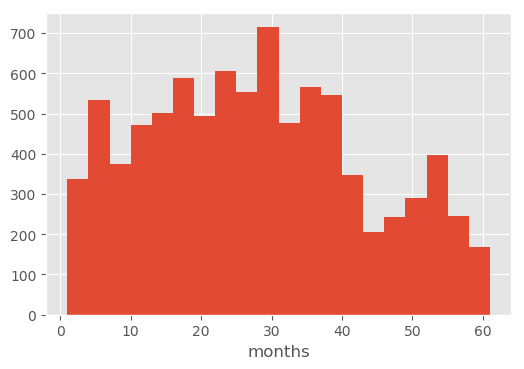

In [32]:
# ProdPeriod length (months)
prod.groupby('EPAssetsId').ProdPeriod.nunique().hist(bins=20)
plt.xlabel('months')
print('min: ', prod.groupby('EPAssetsId').ProdPeriod.nunique().min())
print('max: ', prod.groupby('EPAssetsId').ProdPeriod.nunique().max())
# sanity check
print(prod.groupby('EPAssetsId').ProdPeriod.nunique().sum()==prod.shape[0])

min:  0.0
max:  2766.50492832
nan:  0


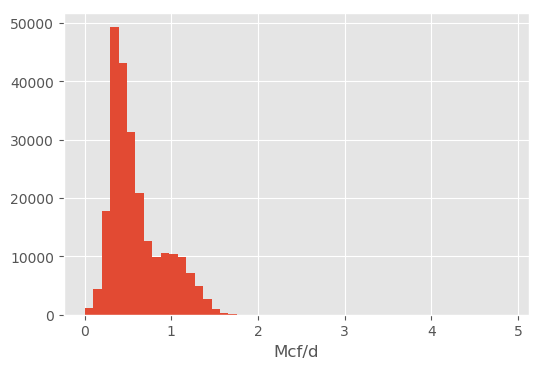

In [33]:
# Gas rate (Mcf/d)
((24*prod.Gas/prod.Duration)**0.2).hist(bins=50)
plt.xlabel('Mcf/d')
print('min: ', (24*prod.Gas/prod.Duration).min())
print('max: ', (24*prod.Gas/prod.Duration).max())
print('nan: ', prod.Gas.isnull().sum())

min:  0.0
max:  32938.42464
nan:  0


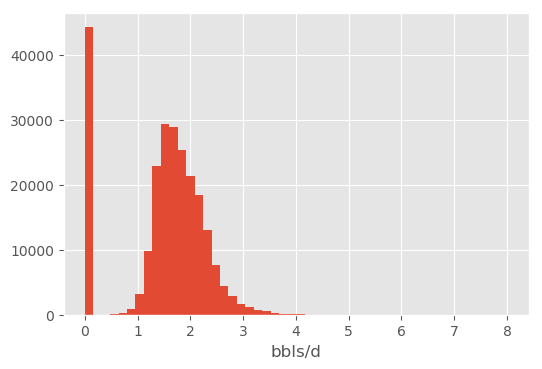

In [34]:
# Oil rate (bbls/d)
((24*prod.Oil/prod.Duration)**0.2).hist(bins=50)
plt.xlabel('bbls/d')
print('min: ', (24*prod.Oil/prod.Duration).min())
print('max: ', (24*prod.Oil/prod.Duration).max())
print('nan: ', prod.Oil.isnull().sum())

min:  0.0
max:  39354.020639999995
nan:  0


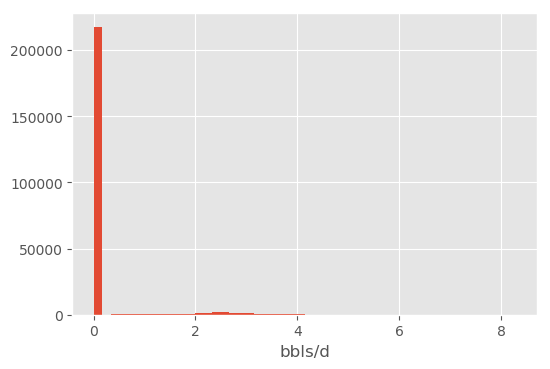

In [35]:
# Condensate rate (bbls/d)
((24*prod.Condensate/prod.Duration)**0.2).hist(bins=50)
plt.xlabel('bbls/d')
print('min: ', (24*prod.Condensate/prod.Duration).min())
print('max: ', (24*prod.Condensate/prod.Duration).max())
print('nan: ', prod.Condensate.isnull().sum())

min:  0.0
max:  158352.0048
nan:  0


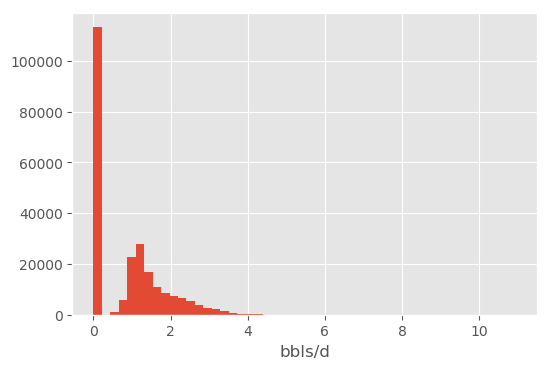

In [36]:
# Water rate
((24*prod.Water/prod.Duration)**0.2).hist(bins=50)
plt.xlabel('bbls/d')
print('min: ', (24*prod.Water/prod.Duration).min())
print('max: ', (24*prod.Water/prod.Duration).max())
print('nan: ', prod.Water.isnull().sum())

min:  1.0
max:  744.0
nan:  0


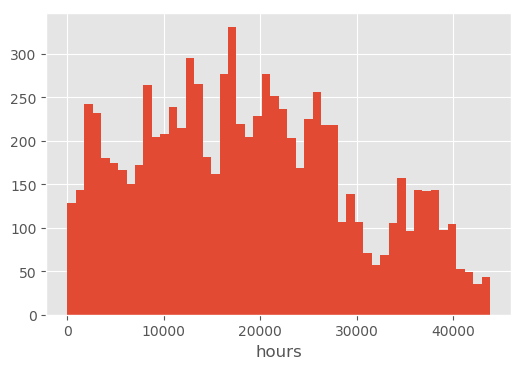

In [37]:
# Duration total per well
prod.groupby('EPAssetsId').Duration.sum().hist(bins=50)
plt.xlabel('hours')
print('min: ', prod.Duration.min())
print('max: ', prod.Duration.max())
print('nan: ', prod.Duration.isnull().sum())

min:  1.0
max:  744.0
mode:  [744.]
nan:  0


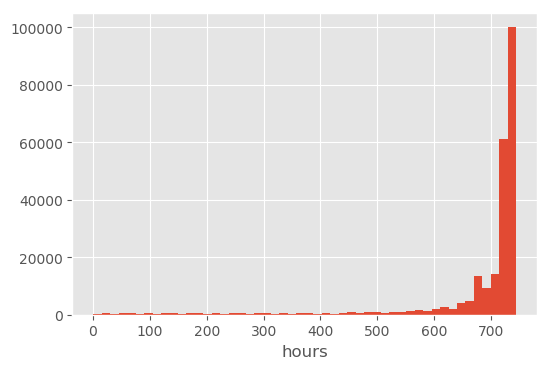

In [38]:
# Duration 
prod.Duration.hist(bins=50)
plt.xlabel('hours')
print('min: ', prod.Duration.min())
print('max: ', prod.Duration.max())
print('mode: ', prod.Duration.mode().values)
print('nan: ', prod.Duration.isnull().sum())

### Export

In [39]:
prod.to_csv('prod_cleaned2.csv', index=False)

## Joining

In [157]:
# wh is the superset of all
print(set(wh.EPAssetsId).issuperset(set(perf.EPAssetsId)))
print(set(wh.EPAssetsId).issuperset(set(prod.EPAssetsId)))

True
True


In [158]:
# perf and prod have majority intersection but not identical
print(len(set(perf.EPAssetsId).difference(set(prod.EPAssetsId))))
print(len(set(prod.EPAssetsId).difference(set(perf.EPAssetsId))))

20
266


In [159]:
# Expected NaN caused by joining
print(len(set(wh.EPAssetsId) - (set(perf.EPAssetsId))))
print(len(set(wh.EPAssetsId) - (set(prod.EPAssetsId))))

279
33
